In [1]:
from datetime import datetime as dt
now = dt.now()
print ("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M %p"))

Analysis on 2023-07-09 at 21:43 PM


In [2]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('http://web.pdx.edu/~gerbing/data/Boston.csv')

In [5]:
df.shape

(506, 15)

In [6]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Remove unwanted column

In [7]:
df = df.drop(columns= df.columns[0])
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Check for missing data

In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Build a model that forecasts the median house price, medv in terms of the average number of rooms, rm.

Isolate the variables into X and y data structures. X is the independent variable, y is the dependent variable.

In [10]:
X = df['rm']
y = df['medv']

The reduction of the data frame into single columns results in a series

In [12]:
print("X: ", type(X))
print("y: ", type(y))

X:  <class 'pandas.core.series.Series'>
y:  <class 'pandas.core.series.Series'>


Check the distribution of the target variable, medv with a histogram (displot). kde is what adds the smoothed line.

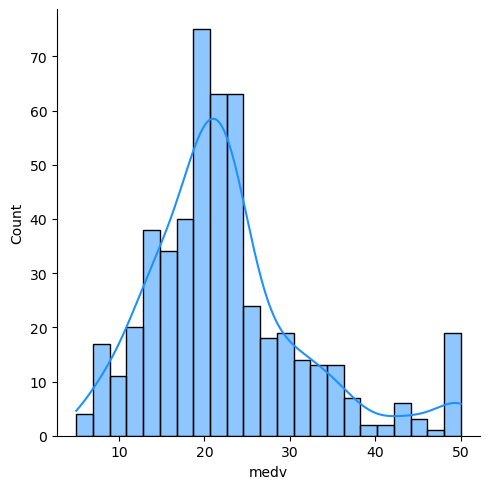

In [13]:
sns.displot(df, x='medv', color='dodgerblue', kde=True)

Before doing linear regression, ensure the relationship between the variables is roughly linear.

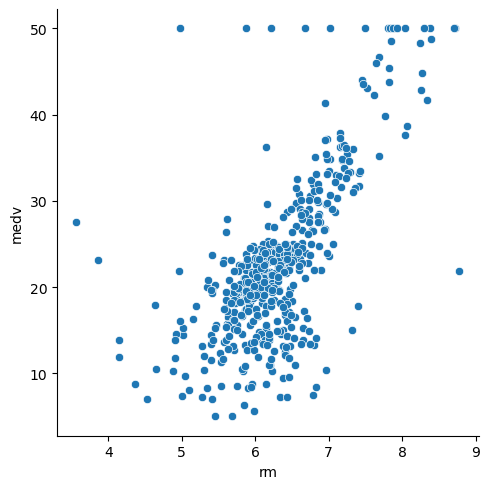

In [14]:
ax = sns.relplot(df, x='rm', y='medv')

What is the correlation between rm and medv?

In [18]:
print("r = ", df['rm'].corr(df['medv']).round(2))

r =  0.7


### Model Analysis

#### Estimation
The estimation procedure assumes a y-intercept of 0 unless there is constant value in the feature data. To compensate, first add a column of 1.0's to the X data structure so that the estimated model will have a y-intercept, and therefore fit better without requiring the assumption of a value of 0.

In [23]:
#first install using conda install statsmodels
import statsmodels.api as sm
from statsmodels.regression.linear_model import RegressionResults
X = sm.add_constant(X)
X.head()

,const,rm
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


Specify the model with OLS() function from statsmodel. OLS = ordinary least squares, the default estimation procedure for linear regression models.

In [24]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           2.49e-74
Time:                        10:04:18   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

For each increase in the average number of rooms, the average selling price increases by $9,102. 

_hypothesis test_: with p<.05 there is a strong probability these two variables are related.

_confidence interval_: We can assume the true population value lies somewhere between 8.279 and 9.925 with 95% confidence.

#### Fit

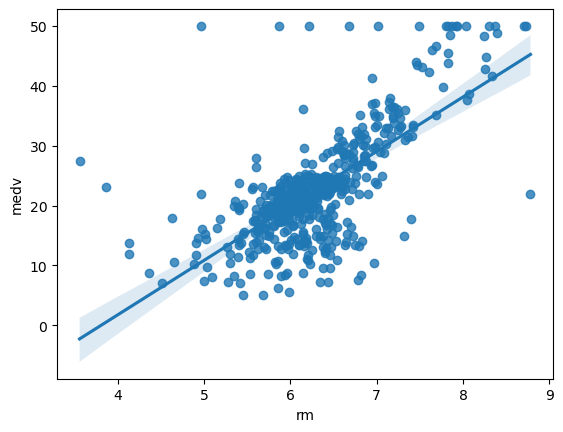

In [38]:
ax = sns.regplot(df, x='rm', y='medv')

To evaluate fit of the model with statistics, access various values computed by the
fit() function, here stored in the structure called results. Use the functions ssr() ,
mse_resid() , and rsquared() to access the fit statistics. The RMSE or standard
deviation of the residuals is not provided directly, so compute as the square root of the
MSE with the function sqrt() from the numpy package. Round all values to two
decimal digits with the round() function.

In [39]:
print("Sum of squared residuals:", results.ssr.round(2))
print("Mean squared error:", results.mse_resid.round(2))
RMSE = np.sqrt(results.mse_resid)
print("Stdev of residuals:", RMSE.round(2))
res_range = 4 * RMSE
print("95% range of residuals:", res_range.round(2))
print("R-squared:", results.rsquared.round(2))

Sum of squared residuals: 22061.88
Mean squared error: 43.77
Stdev of residuals: 6.62
95% range of residuals: 26.46
R-squared: 0.48
